# India Sucide Rates 2001 to 2012

"This compiled dataset pulled from four other datasets linked by time and place, and was built to find signals correlated to increased suicide rates among different States, across the socio-economic spectrum."

This data set (I call it the "Suicides in India 2001-2012") contains a combination of Content and Parameters features:

 **Content**
* Time Period: 2001 - 2012
* Granularity: Yearly
* Location: States and U.T's of India

* Parameters:

* a) Suicide causes
* b) Education status
* c) By means adopted
* d) Professional profile
* e) Social status

 I was interested in exploring the possible causes that might increase the risk of suicide in societies, using different Data Visulization Tools.

In [5]:
import pandas as pd
import numpy as np
data = pd.read_csv("Suicides in India 2001-2012.csv",sep=",")
data.count()

State        237519
Year         237519
Type_code    237519
Type         237519
Gender       237519
Age_group    237519
Total        237519
dtype: int64

In [6]:
data_all_india = data.loc[data['State']=='Total (All India)',:]
data_ut = data.loc[data['State']=='Total (Uts)',:]
data_state = data.loc[data['State']=='Total (States)',:]

In [7]:
data.drop(data[data['State']=='Total (All India)'].index,inplace =True)
data.drop(data[data['State']=='Total (States)'].index,inplace =True)
data.drop(data[data['State']=='Total (Uts)'].index,inplace =True)
data.reset_index(drop=True,inplace=True)
data.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [8]:
pivot_state = pd.pivot_table(data,values='Total',index='State',aggfunc=sum)
pivot_type = pd.pivot_table(data,values='Total',index='Type',aggfunc=sum)
pivot_state['percent'] = pivot_state['Total']/sum(pivot_state['Total'])*100
pivot_state.reset_index(inplace=True)
pivot_type.reset_index(inplace=True,)
pivot_state.sort_values(by='Total',inplace=True,ascending=False)
pivot_type.sort_values(by='Total',inplace=True,ascending=False)

C:\Users\parag\AppData\Local\Temp\ipykernel_9788\169794379.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_state = pd.pivot_table(data,values='Total',index='State',aggfunc=sum)
C:\Users\parag\AppData\Local\Temp\ipykernel_9788\169794379.py:2: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_type = pd.pivot_table(data,values='Total',index='Type',aggfunc=sum)


In [9]:
pivot_type[-20:]

,Type,Total
22,Death of Dear Person,10321
15,By Overdose of sleeping pills,9960
12,By Other means,9238
20,Cancer,9058
37,Illness (Aids/STD),8723
9,By Jumping from (Other sites),8127
10,By Jumping off Moving Vehicles/Trains,8116
8,By Jumping from (Building),7871
46,Not having Children(Barrenness/Impotency,7822
52,Post Graduate and Above,7475


C:\Users\parag\AppData\Local\Temp\ipykernel_9788\1169849161.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pivot_state,y='State',x='Total',palette="Blues_d")


<Axes: xlabel='Total', ylabel='State'>

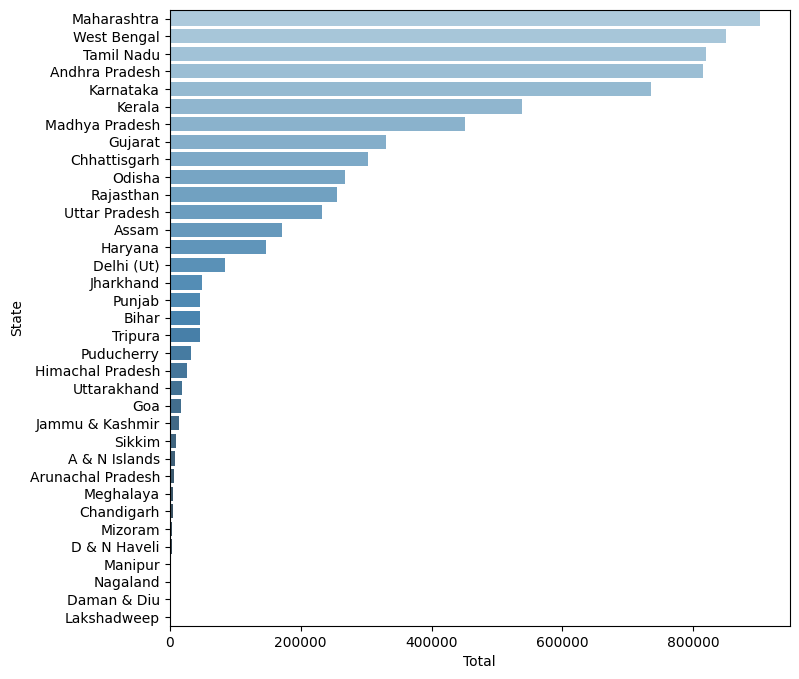

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
fig,ax = plt.subplots(figsize=(8,8))
sns.barplot(data=pivot_state,y='State',x='Total',palette="Blues_d")

C:\Users\parag\AppData\Local\Temp\ipykernel_9788\1233664592.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pivot_type,y='Type',x='Total',palette="Blues_d", legend= False)


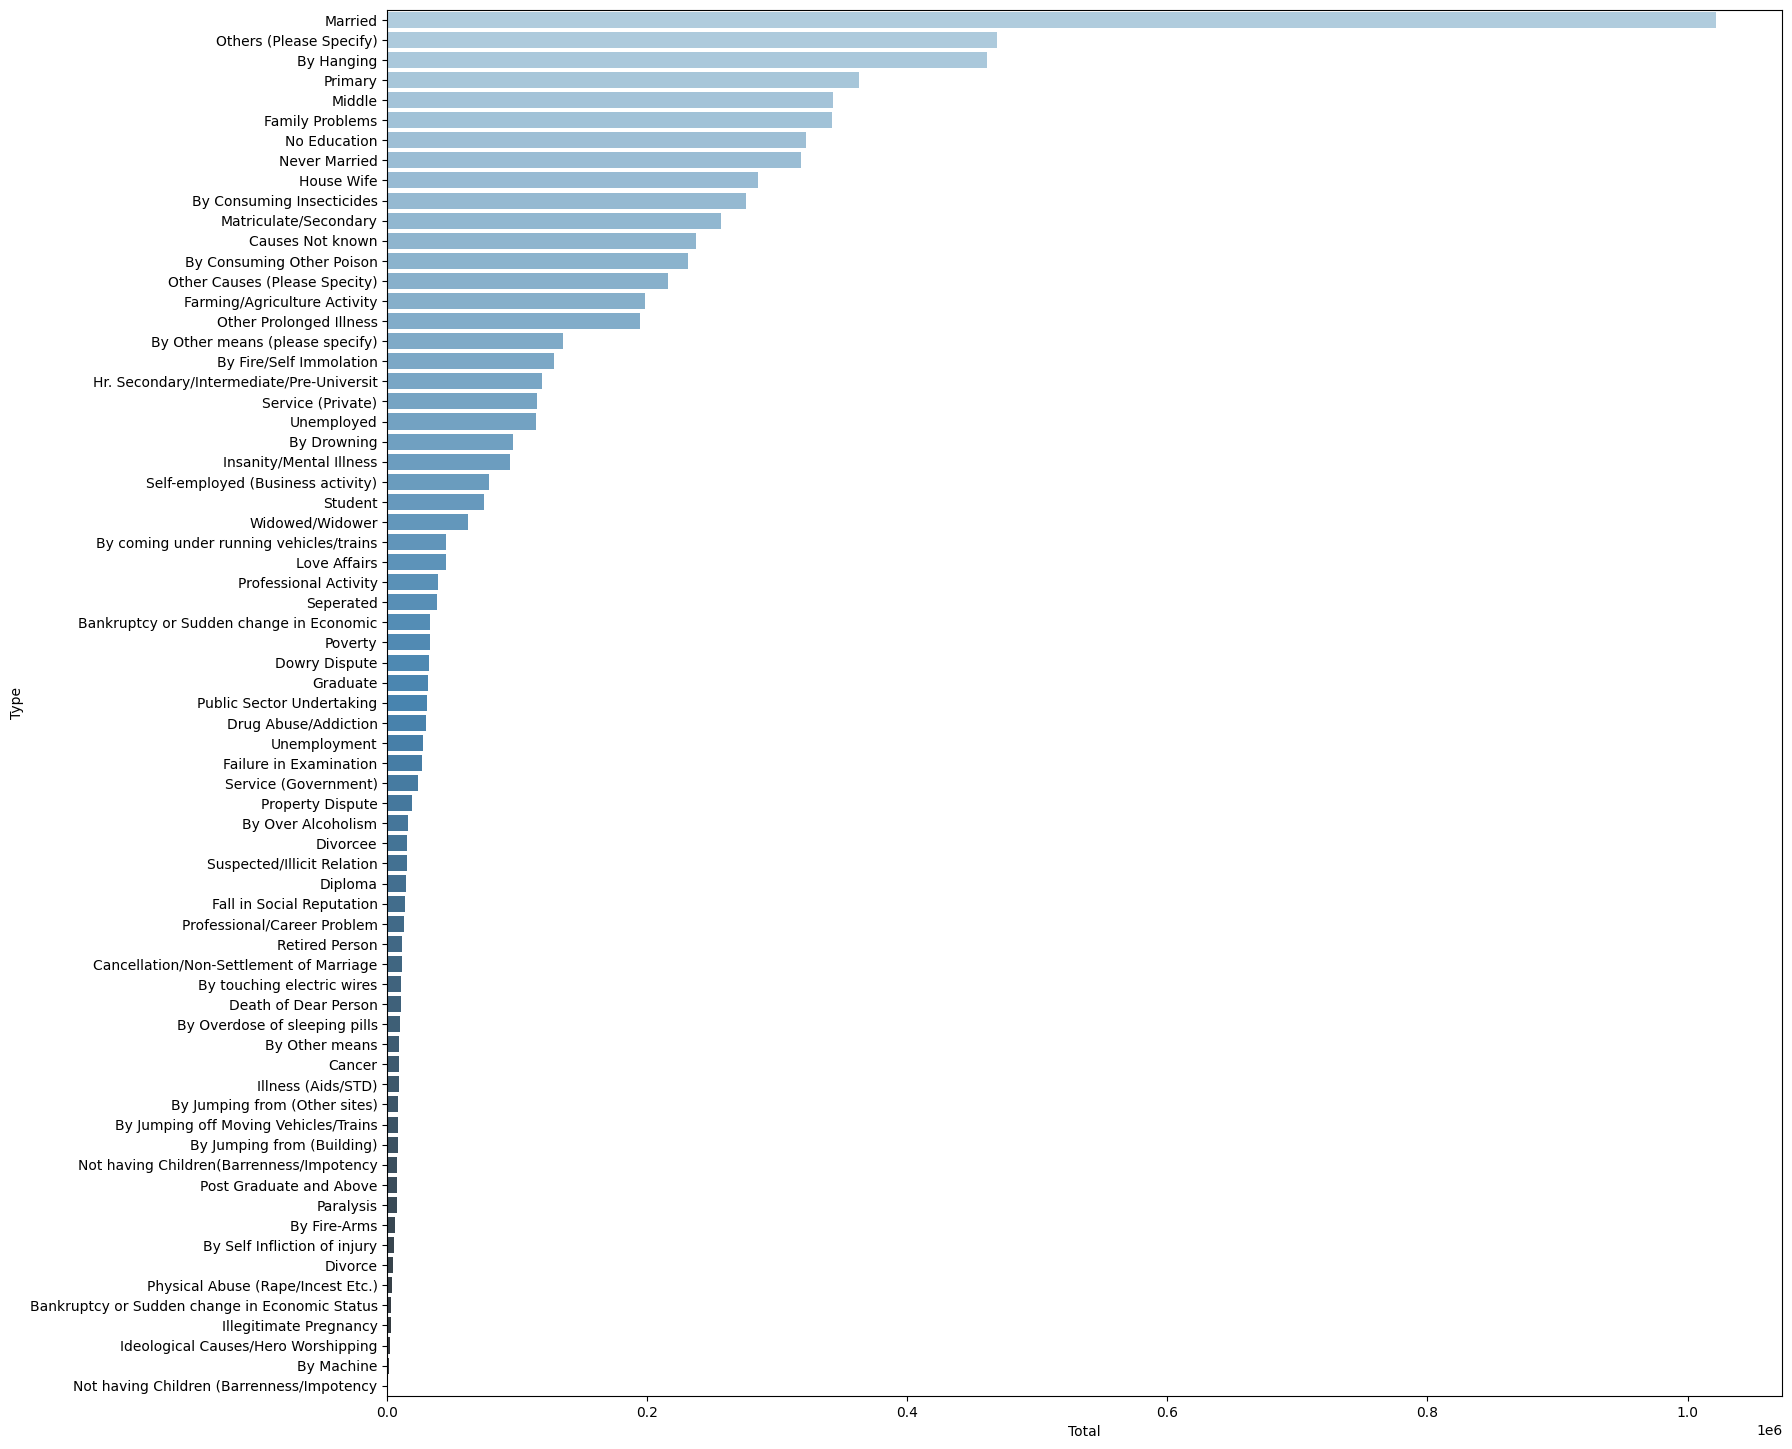

In [16]:
fig,ax = plt.subplots(figsize=(18,18))
sns.barplot(data=pivot_type,y='Type',x='Total',palette="Blues_d", legend= False)
plt.show()

## Lets take first 20 states with max number of suicides and parallely take major issues for consideration.

In [17]:
data

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0
...,...,...,...,...,...,...,...
236578,West Bengal,2012,Social_Status,Seperated,Male,0-100+,149
236579,West Bengal,2012,Social_Status,Widowed/Widower,Male,0-100+,233
236580,West Bengal,2012,Social_Status,Married,Male,0-100+,5451
236581,West Bengal,2012,Social_Status,Divorcee,Male,0-100+,189


In [19]:
k=data.groupby(by=['Gender','Age_group'],as_index=False)['Total'].sum()
k

,Gender,Age_group,Total
0,Female,0-100+,1048026
1,Female,0-14,49436
2,Female,15-29,701215
3,Female,30-44,477461
4,Female,45-59,232542
5,Female,60+,98242
6,Male,0-100+,1863836
7,Male,0-14,48974
8,Male,15-29,832822
9,Male,30-44,994138


<Axes: xlabel='Age_group', ylabel='Total'>

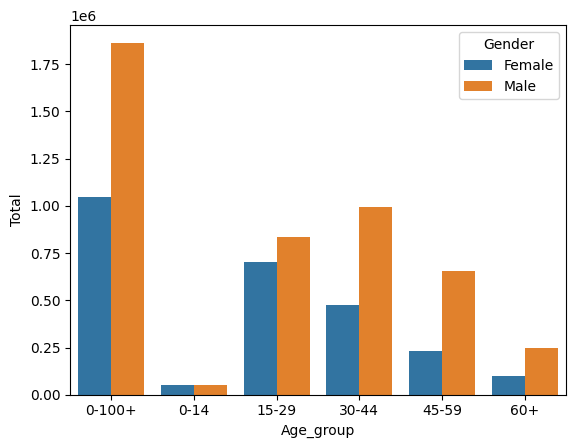

In [20]:
sns.barplot(x="Age_group", y="Total",hue='Gender',data=k)

In [21]:
top_20 = list(pivot_type[:20]['Type'])

In [22]:
l=[]
for i in top_20:

    l.append(data.loc[data['Type']==i].groupby(by=['Gender','Age_group'],as_index=False)['Total'].sum())

In [24]:
l[1]

,Gender,Age_group,Total
0,Female,0-14,7208
1,Female,15-29,42823
2,Female,30-44,31993
3,Female,45-59,19068
4,Female,60+,10099
5,Male,0-14,7458
6,Male,15-29,98050
7,Male,30-44,125922
8,Male,45-59,87142
9,Male,60+,39384


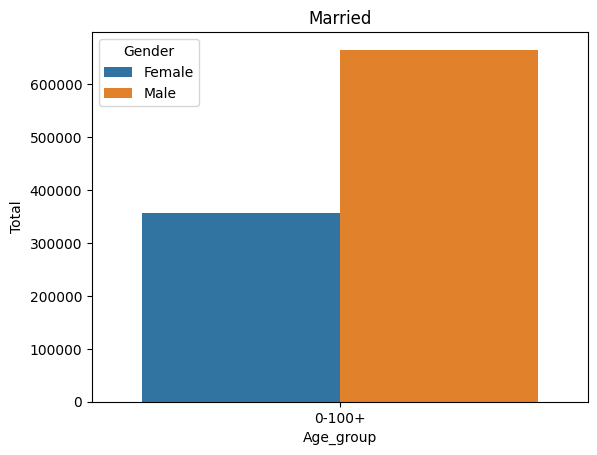

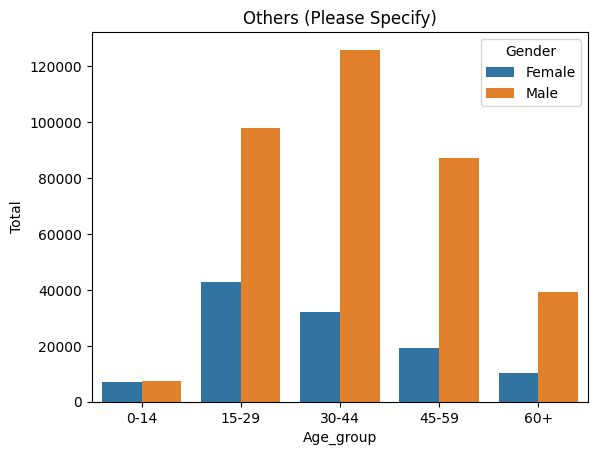

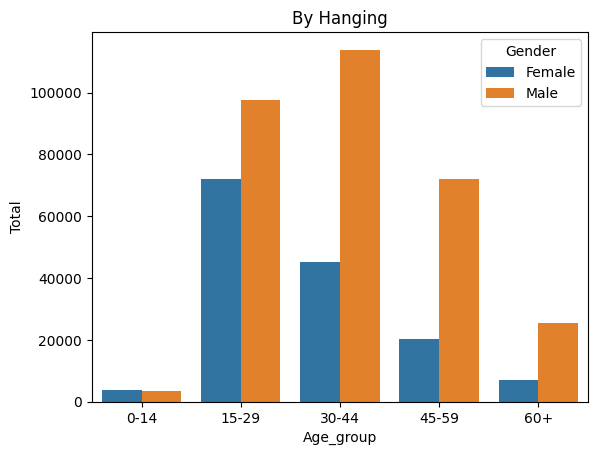

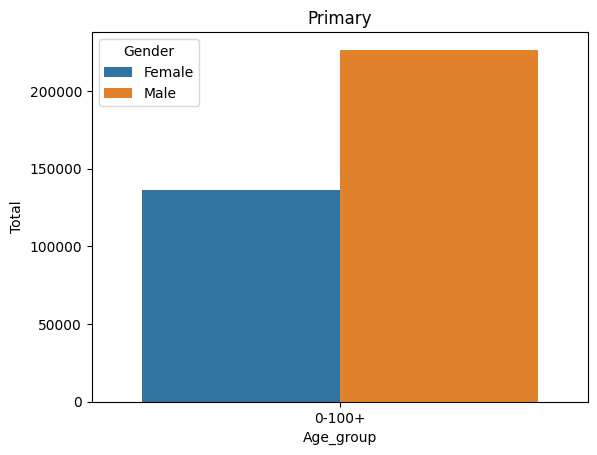

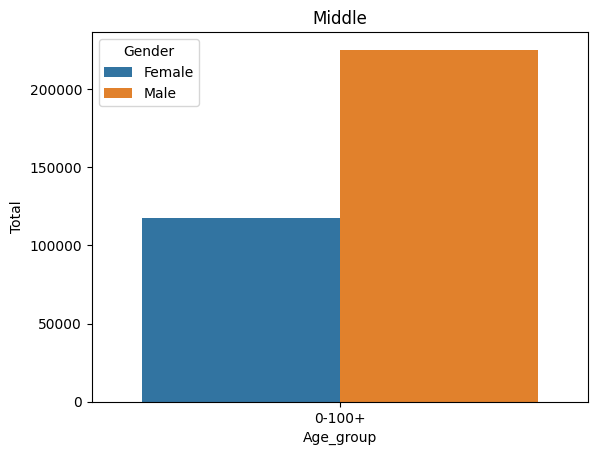

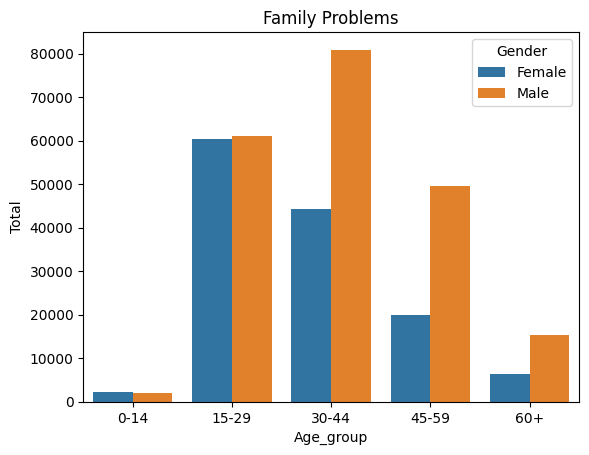

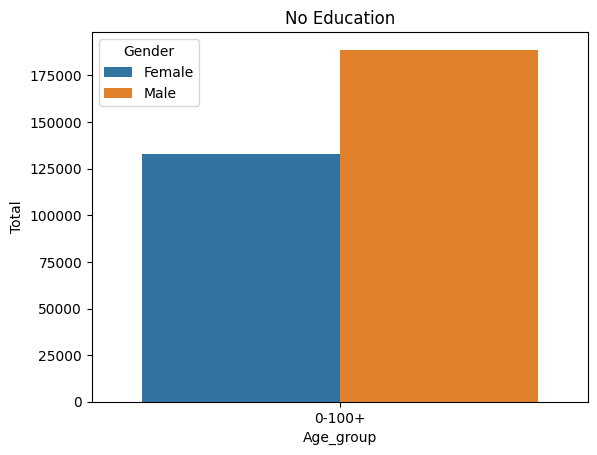

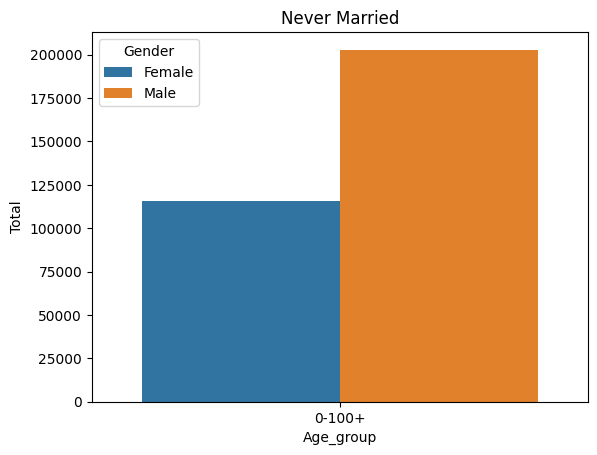

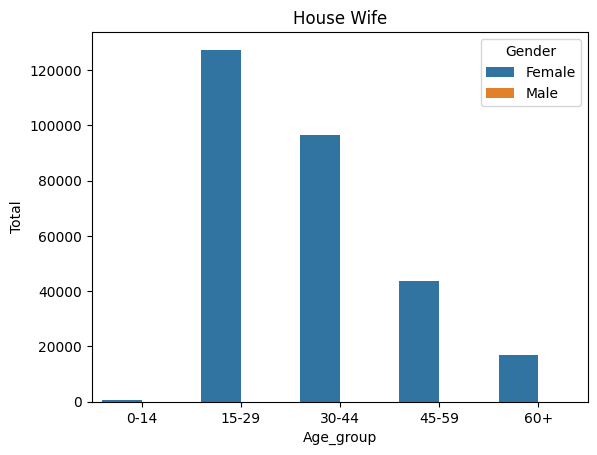

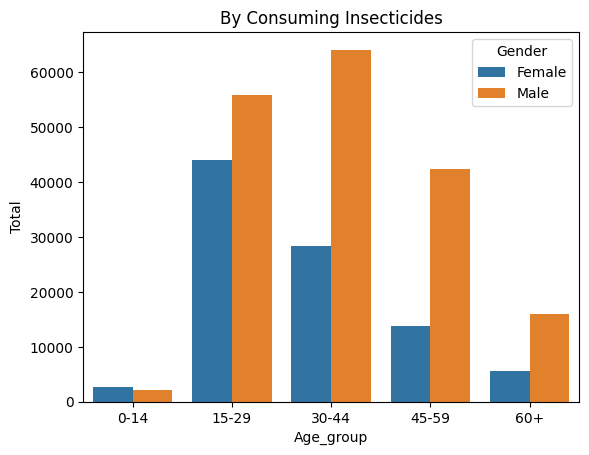

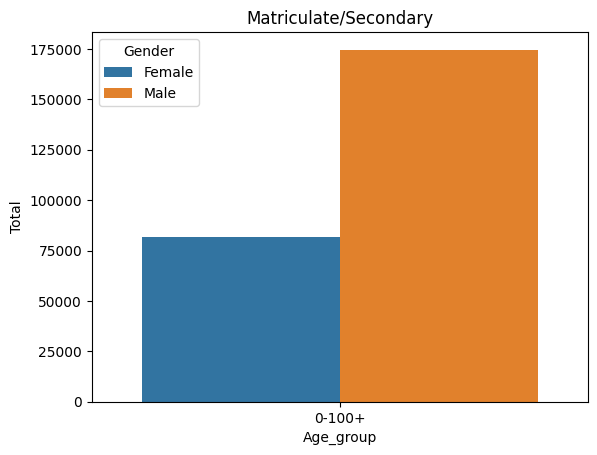

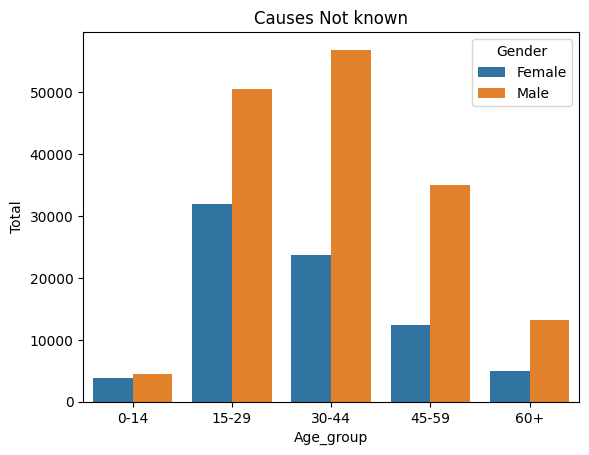

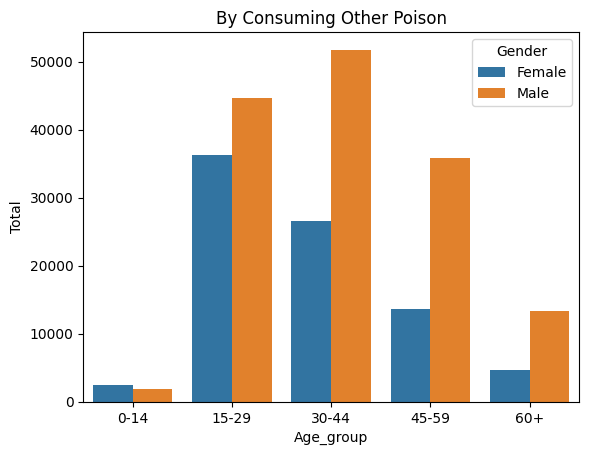

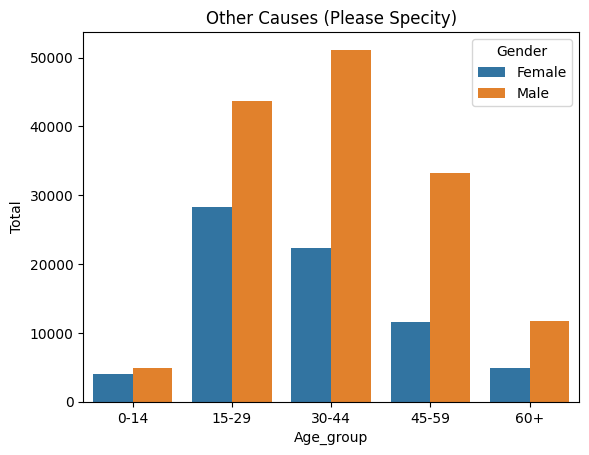

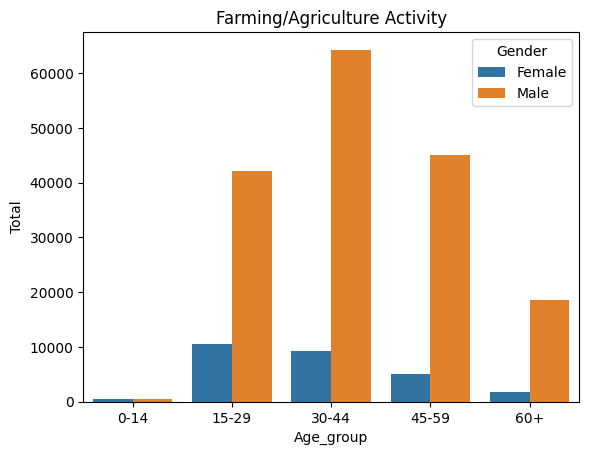

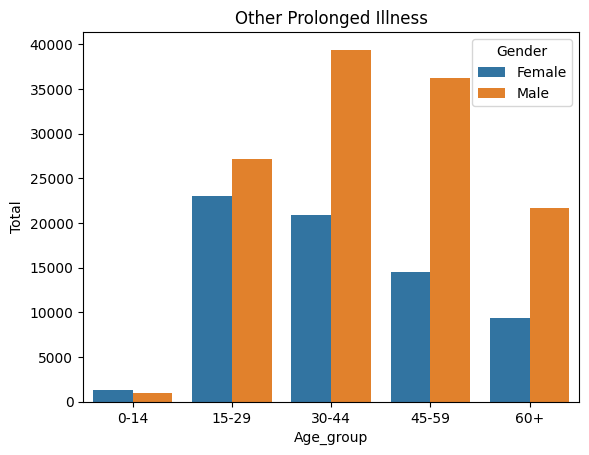

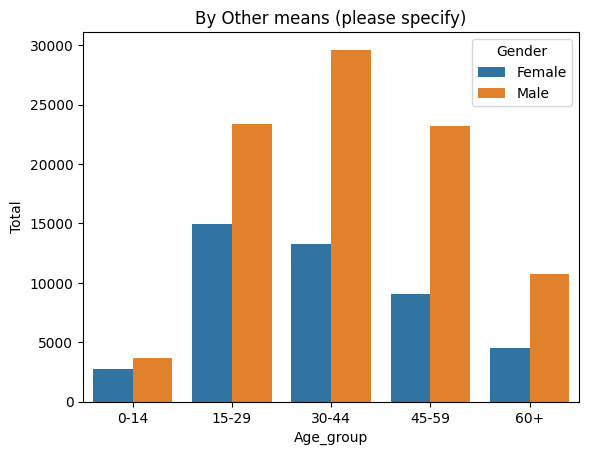

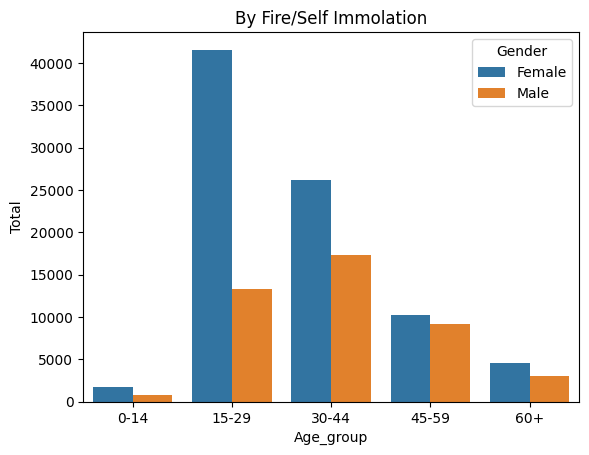

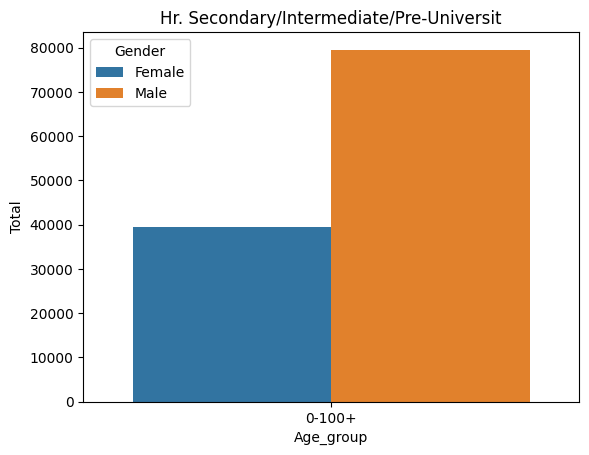

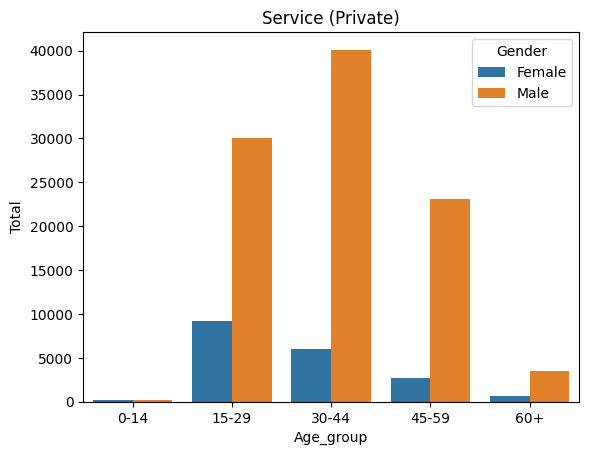

In [25]:
for i in range(20):
    plt.figure()
    plt.title(top_20[i])
    sns.barplot(x="Age_group", y="Total",hue='Gender',data=l[i],)
    

## It is observed that the deaths for female are maximum in age group of 15-29 . And for male its mostly 30-44 age group.



In [26]:
data.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [27]:
data.Year.value_counts()

Year
2011    19728
2005    19725
2012    19721
2001    19719
2008    19719
2007    19716
2010    19714
2002    19712
2003    19708
2006    19708
2009    19708
2004    19705
Name: count, dtype: int64

In [28]:
la=[]
for i in top_20:
    la.append(data.loc[data['Type']==i].groupby(by=['Type','Year'],as_index=False)['Total'].sum())

In [32]:
l = data.groupby(by=['Type','Year'],as_index=False)['Total'].sum()


[       Type  Year  Total
 0   Married  2001  75123
 1   Married  2002  75345
 2   Married  2003  77148
 3   Married  2004  79668
 4   Married  2005  80671
 5   Married  2006  85321
 6   Married  2007  87657
 7   Married  2008  87863
 8   Married  2009  89492
 9   Married  2010  93207
 10  Married  2011  95015
 11  Married  2012  95264,
                        Type  Year  Total
 0   Others (Please Specify)  2001  32102
 1   Others (Please Specify)  2002  31478
 2   Others (Please Specify)  2003  31208
 3   Others (Please Specify)  2004  35835
 4   Others (Please Specify)  2005  36150
 5   Others (Please Specify)  2006  35944
 6   Others (Please Specify)  2007  40883
 7   Others (Please Specify)  2008  42337
 8   Others (Please Specify)  2009  39927
 9   Others (Please Specify)  2010  48741
 10  Others (Please Specify)  2011  50360
 11  Others (Please Specify)  2012  44182,
           Type  Year  Total
 0   By Hanging  2001  29757
 1   By Hanging  2002  31385
 2   By Hanging  2003  3257

# SUICIDAL TRENDS VS YEAR #

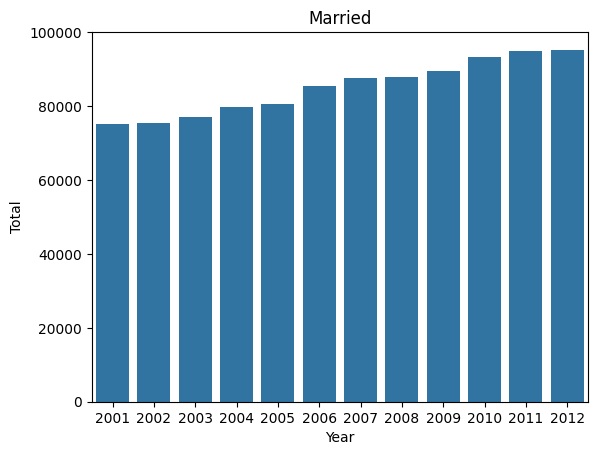

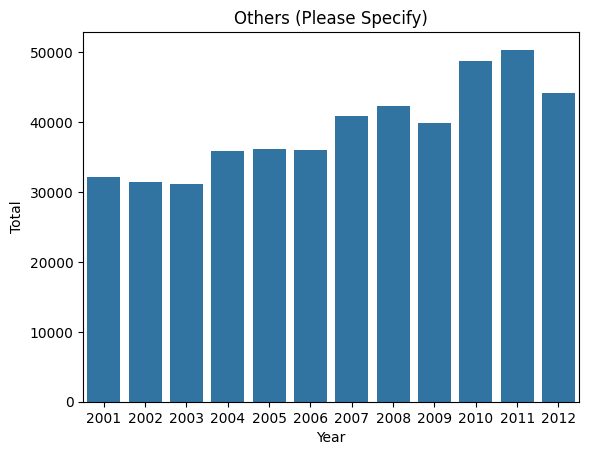

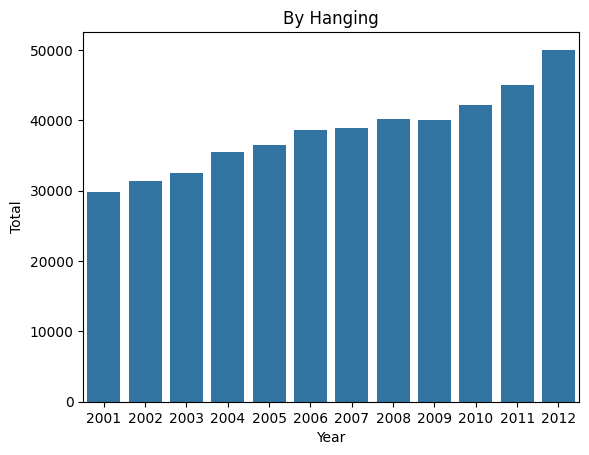

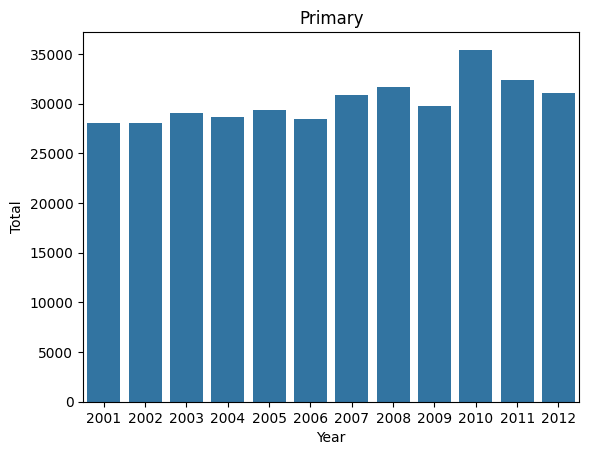

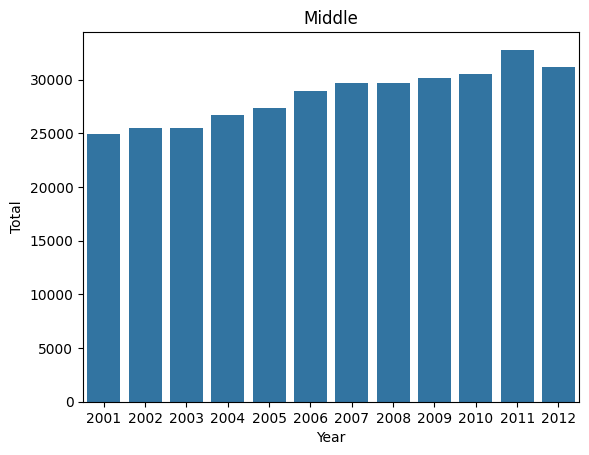

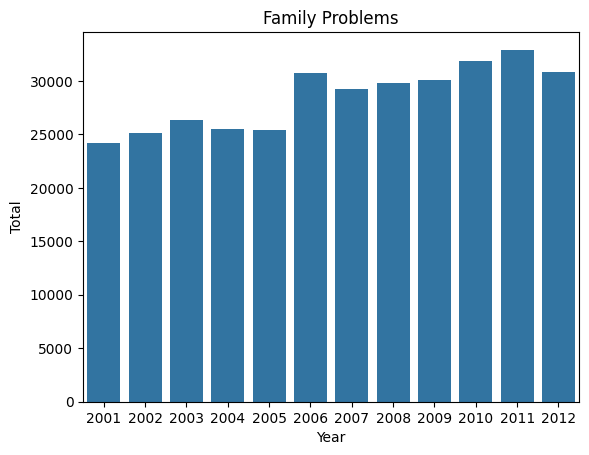

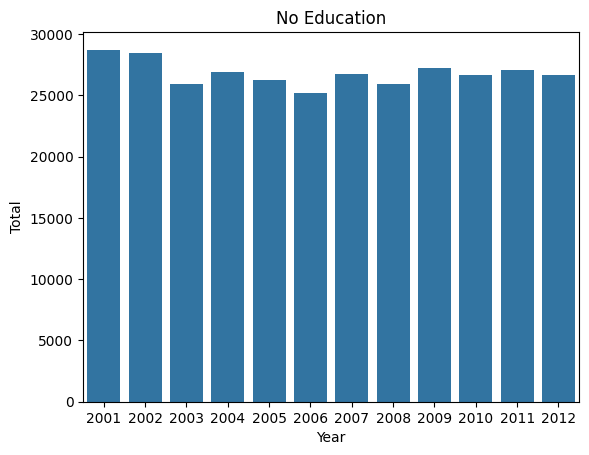

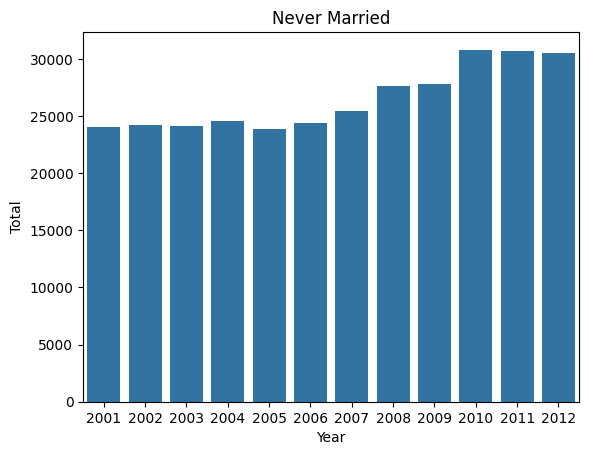

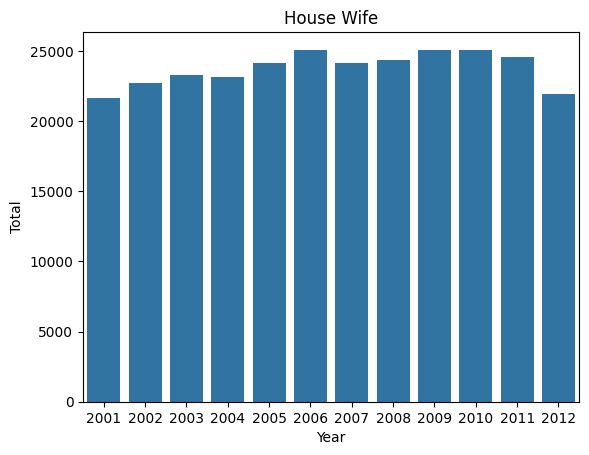

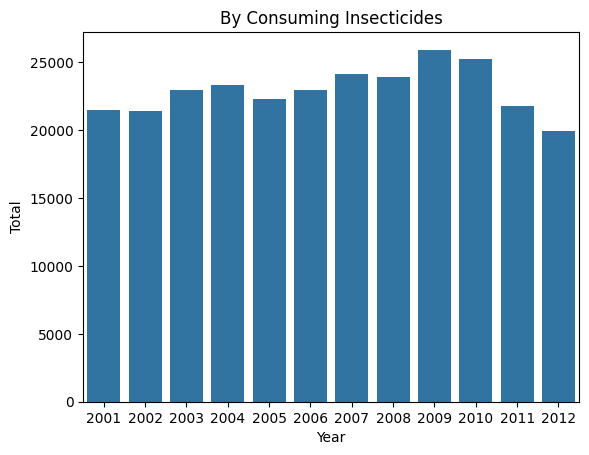

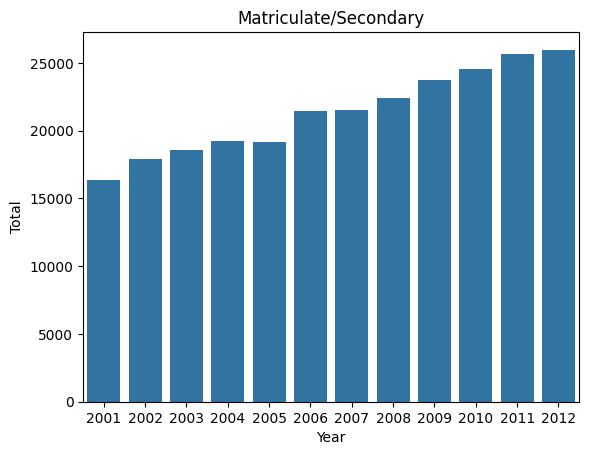

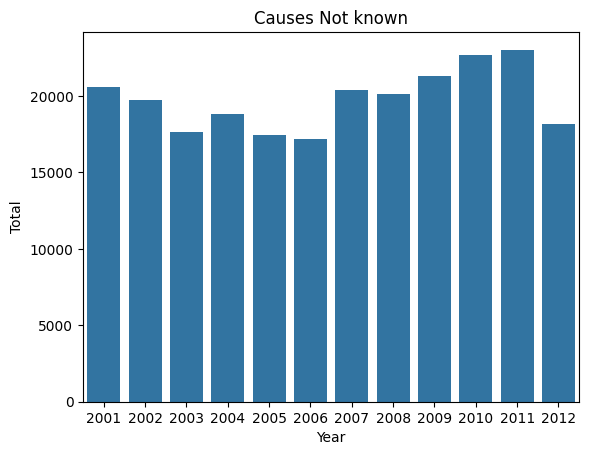

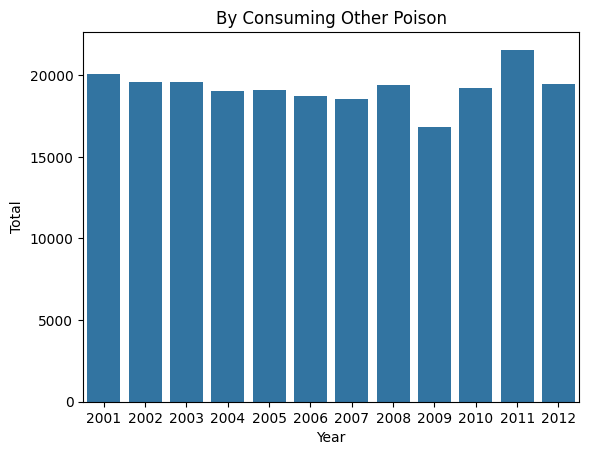

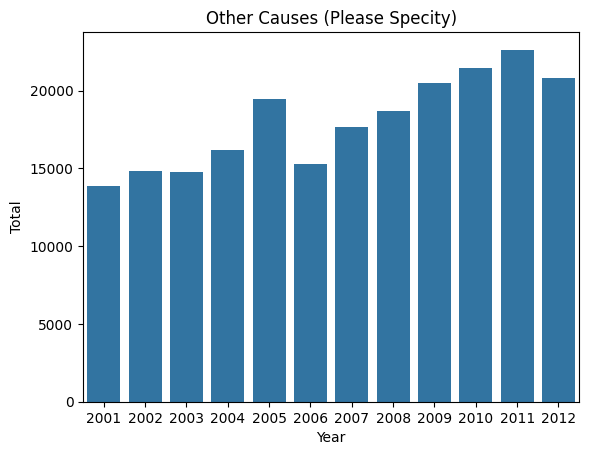

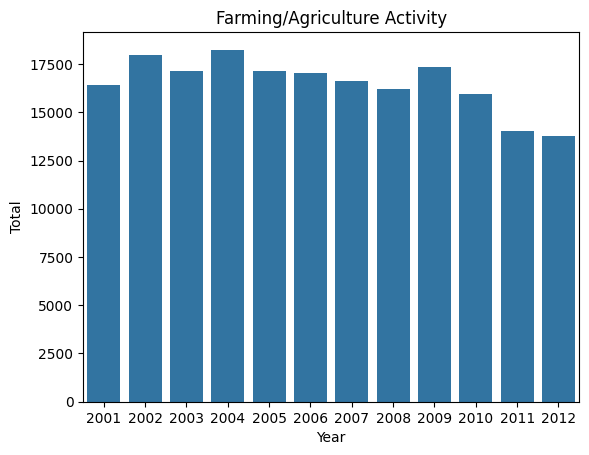

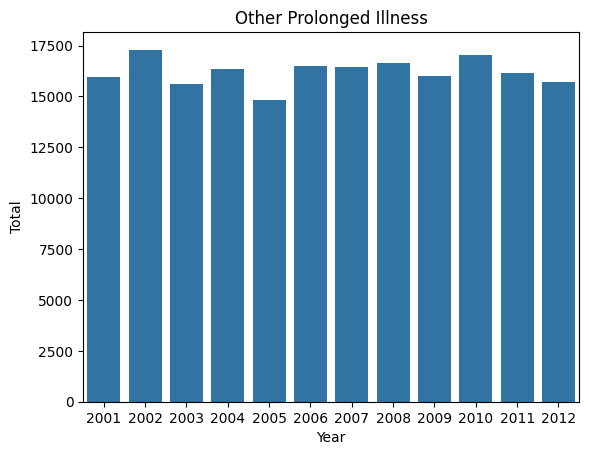

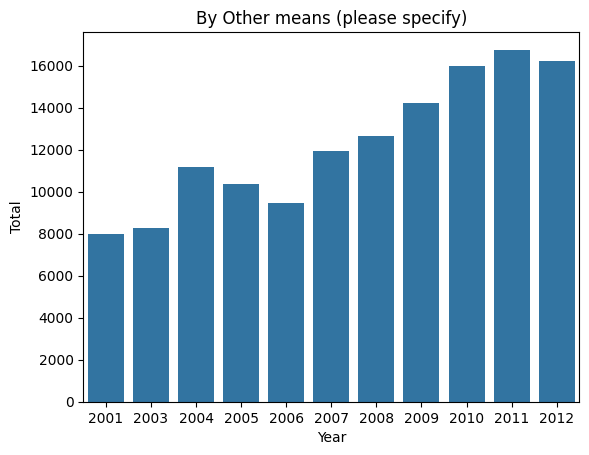

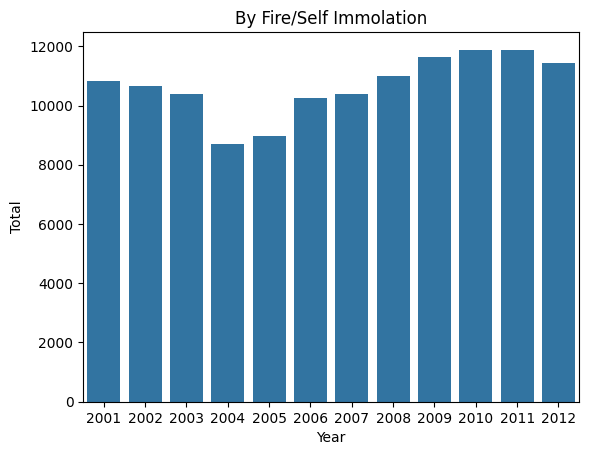

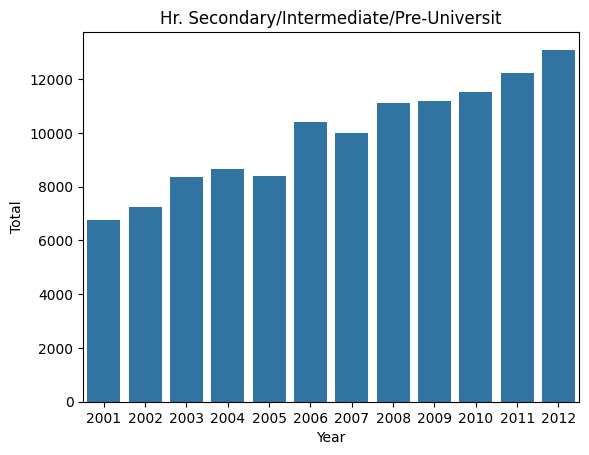

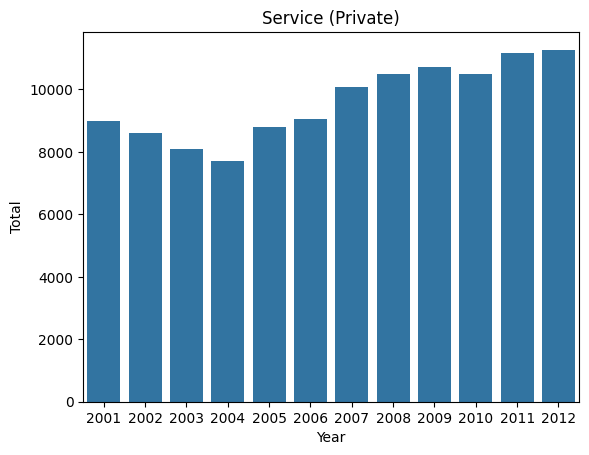

In [34]:
for i in range(20):
    plt.figure()
    plt.title(top_20[i])
    sns.barplot(x="Year", y="Total",data=la[i])
    
